In [34]:
import os

# Set variabel lingkungan OMP_NUM_THREADS sebelum menjalankan KMeans
os.environ['OMP_NUM_THREADS'] = '2'

# Sisanya kode Anda
import pandas as pd
from sklearn.cluster import KMeans

# Membaca data dari file CSV
data = pd.read_csv('heart.csv')

# Pilih kolom yang akan digunakan untuk clustering
X = data[['age', 'trtbps', 'chol', 'thalachh']]

# Mengambil data ke-166 sebagai pusat atau acuan untuk klaster
acuan_1 = X.iloc[165]  # Data ke-166 (indeks dimulai dari 0)
acuan_2 = X.iloc[302]  # Data ke-166 (indeks dimulai dari 0)

# Inisialisasi pusat klaster menggunakan data ke-166
centroids = [acuan_1.values, acuan_2.values]  

# Inisialisasi dan melatih model K-Means dengan pusat yang telah ditentukan
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1)
kmeans.fit(X)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init=[array([ 67, 160, 286, 108], dtype=int64),
             array([ 57, 130, 236, 174], dtype=int64)],
       n_clusters=2, n_init=1)

In [35]:

data_baru = pd.DataFrame({'age': [2.3], 'trtbps': [33], 'chol' :[3.3] ,'thalachh' : [4.2]}) 

# Melakukan prediksi untuk data baru
prediksi_kmeans = kmeans.predict(data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi K-Means:", prediksi_kmeans)


Hasil prediksi K-Means: [1]


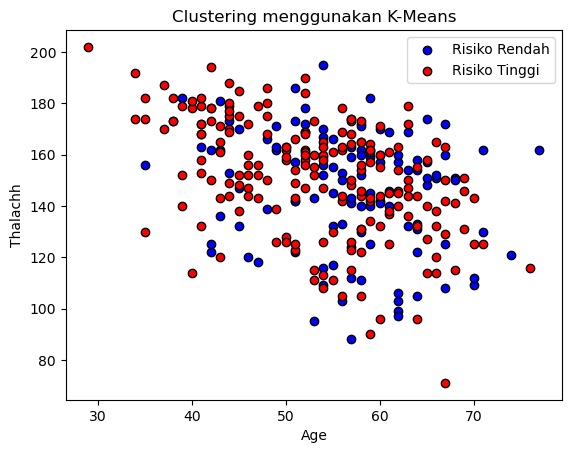

In [36]:
import matplotlib.pyplot as plt


# Menggunakan kmeans.labels_ untuk mendapatkan label klaster dari data yang telah dilatih
labels = kmeans.labels_

# Menambahkan kolom 'cluster' ke data asli
data['cluster'] = labels
labels = data['cluster'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0['age'], cluster_0['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1['age'], cluster_1['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan K-Means')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()
plt.show()

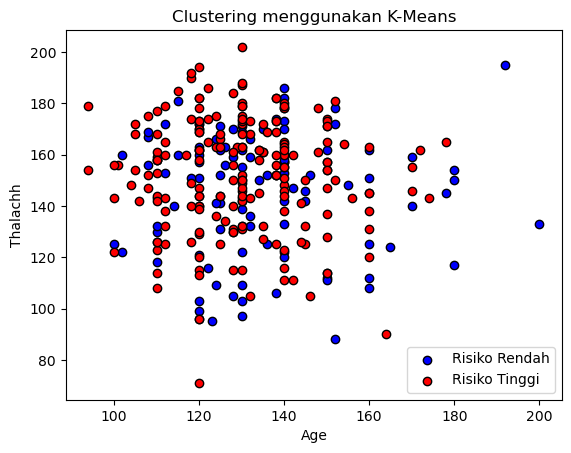

In [37]:
import matplotlib.pyplot as plt

# Menggunakan kmeans.labels_ untuk mendapatkan label klaster dari data yang telah dilatih
labels = kmeans.labels_

# Menambahkan kolom 'cluster' ke data asli
data['cluster'] = labels
labels = data['cluster'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0['trtbps'], cluster_0['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1['trtbps'], cluster_1['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan K-Means')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()
plt.show()

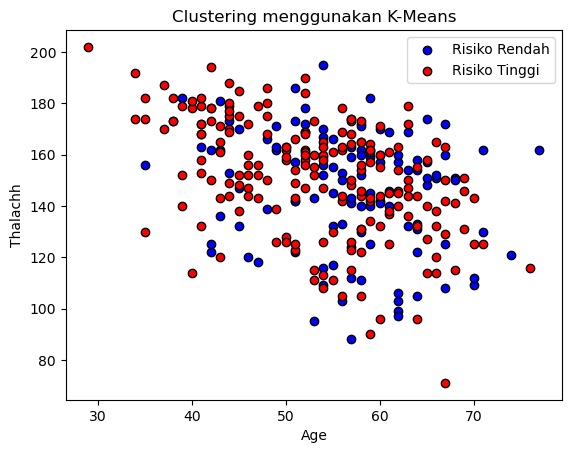

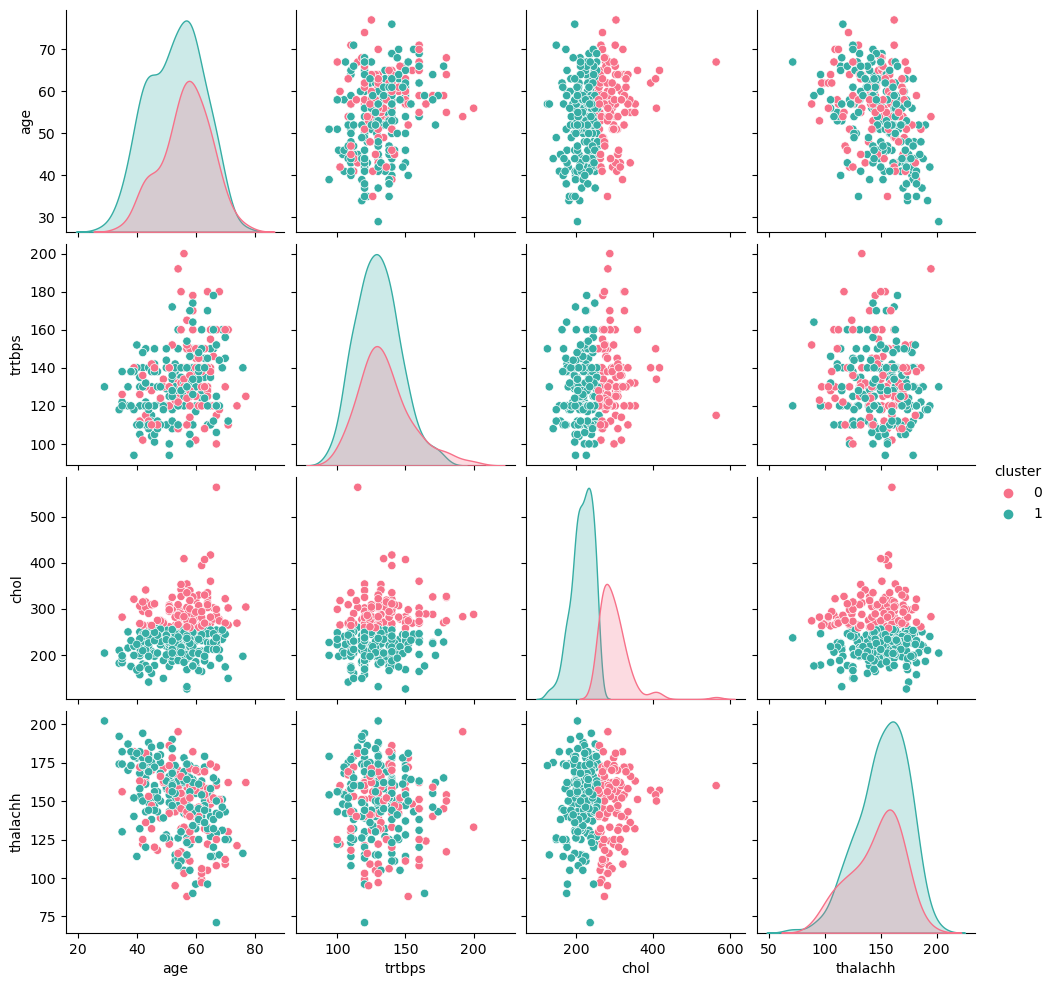

In [40]:
import seaborn as sns
labels = kmeans.labels_
data['cluster'] = labels
labels = data['cluster'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

plt.scatter(cluster_0['age'], cluster_0['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1['age'], cluster_1['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan K-Means')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()

# Menampilkan pair plot untuk visualisasi fitur-fitur dalam satu plot
sns.pairplot(data[['age', 'trtbps', 'chol', 'thalachh', 'cluster']], hue='cluster', palette='husl')
plt.show()